In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ngsolve import *

In [2]:
import importlib
import sys
from pathlib import Path
import os 
sys.path.append(str(Path(os.getcwd()).parent / "src"))

import active_gel_fem
importlib.reload(active_gel_fem)

import utils 
importlib.reload(utils)

<module 'utils' from '/Users/yuli/Documents/Code/Cleavage/src/utils.py'>

In [3]:
# Create simulation instance

chi_passive = 0. 
chi_active = 10

tanh = lambda arg: (exp(arg) - exp(-arg))/(exp(arg)+exp(-arg)) 
left_edge = 0.5 - 0.05
right_edge = 0.5 + 0.05
left_transition = 0.5 * (tanh(20*(x - left_edge)))
right_transition = 0.5 * (tanh(20*(right_edge - x)))
chi0 = chi_passive + chi_active*(left_transition + right_transition)

sim = active_gel_fem.NematicActiveGel2D(
    width=1, height=1, maxh=0.03,
    gamma=1, eta_1=1, eta_2=0,
    k=1, D= 0.001,
    kappa = 0.01,
    beta1 = 10, beta2 = 5, 
    chi0 = chi0,  chi1 = 6, 
    Qsq = 1, 
)

In [4]:
for i in range(len(sim.density.vec.data)): 
    sim.density.vec.data[i] = np.random.normal(1, 0.05)
    sim.nematic_xx.vec.data[i] = np.random.normal(0, 0.05)

# d = 1 + 0.1*(left_transition + right_transition)
# sim.set_initial_density(d)


In [5]:
# Run simulation
times, rhos, velocities = sim.simulate(
    tend=10,
    tau=0.01,
    save_interval=100 # save once a second 
)

  6%|▌         | 56/1000 [00:00<00:04, 192.23it/s]

craete bilinearformapplication


100%|██████████| 1000/1000 [00:04<00:00, 203.66it/s]


In [6]:
sim.visualize(animate=False)

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

In [7]:
n = -1

rhos = sim.gfut.components[1]
v = sim.gfut.components[0]
Q = sim.gfut.components[2]
q = sim.gfut.components[3]

rho_gf = GridFunction(rhos.space)
rho_gf.vec.data = rhos.vecs[n]

v_gf = GridFunction(v.space)
v_gf.vec.data = v.vecs[n]

Q_gf = GridFunction(Q.space) 
Q_gf.vec.data = Q.vecs[n]

q_gf = GridFunction(q.space)
q_gf.vec.data = q.vecs[n]


X = np.linspace(0, 1, 50)
Y = np.linspace(0, 1, 50)

rho_vals = np.array([rho_gf(y, x) for x in X for y in Y]).reshape(50, 50) # outer loop: x in X, inner loop: y in Y  
v_vals = np.array([v_gf(y, x) for x in X for y in Y]).reshape(50, 50, 2)
Q_vals = np.array([Q_gf(y, x) for x in X for y in Y]).reshape(50, 50)
q_vals = np.array([q_gf(y, x) for x in X for y in Y]).reshape(50, 50)

nx, ny = utils.nematic_to_vector(Q_vals, q_vals)


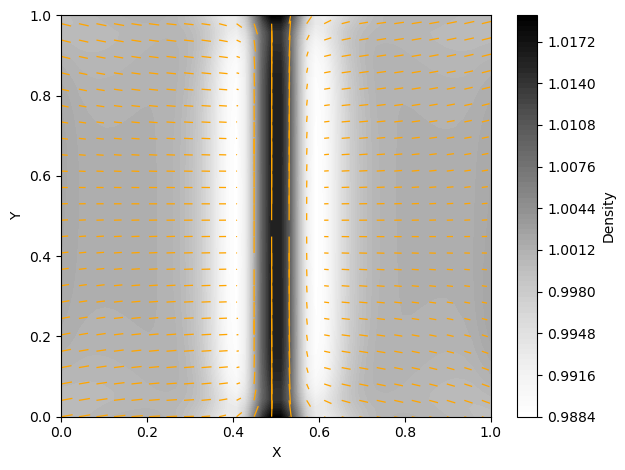

In [ ]:
# Plot the contour for rho_vals
contour = plt.contourf(X, Y, rho_vals, levels=100, cmap='Greys')
plt.colorbar(label='Density')

# Create a mesh grid for quiver plot
X_mesh, Y_mesh = np.meshgrid(X, Y)

# Extract x and y components of the velocity vectors
vx = v_vals[:, :, 0]
vy = v_vals[:, :, 1]

# Add quiver plot for v_vals (may need to adjust scale and density)
# Using a subset of points for clarity
stride = 2 # Adjust this to show more or fewer arrows
# plt.quiver(X_mesh[::stride, ::stride], Y_mesh[::stride, ::stride], 
#            vx[::stride, ::stride], vy[::stride, ::stride], 
#            color='orange', 
#            width=0.003,     # Increase width to make arrow shafts thicker
#            headwidth=3,     # Increase headwidth for wider arrowheads
#            headlength=5,    # Increase headlength for longer arrowheads
#            headaxislength=6 # Increase headaxislength for more pronounced heads
# ) 

plt.quiver(X_mesh[::stride, ::stride], Y_mesh[::stride, ::stride], 
           nx[::stride, ::stride], ny[::stride, ::stride], 
           color='orange', 
           width=0.003,     # Increase width to make arrow shafts thicker
           headlength=0,    
           headaxislength=0 
) 

plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()